In [2]:
%pip install -qU pypdf langchain-community langchain-text-splitters


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file_path = './income_tax.pdf'
loader = PyPDFLoader(pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [4]:
pages[35]

Document(metadata={'producer': 'iText 2.1.7 by 1T3XT', 'creator': 'PyPDF', 'creationdate': '2026-01-06T15:12:32+09:00', 'moddate': '2026-01-06T15:12:32+09:00', 'source': './income_tax.pdf', 'total_pages': 137, 'page': 35, 'page_label': '36'}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법\n1. 비치ㆍ기록한 장부에 의하여 신고하여야 할 소득금액의 100분의 20 이상을 누락하여 신고한 경우\n2. 기장세액공제와 관련된 장부 및 증명서류를 해당 과세표준확정신고기간 종료일부터 5년간 보관하지 아니한 경\n우. 다만, 천재지변 등 대통령령으로 정하는 부득이한 사유에 해당하는 경우에는 그러하지 아니하다.\n③ 기장세액공제에 관하여 필요한 사항은 대통령령으로 정한다.\n[전문개정 2009. 12. 31.]\n \n제56조의3(전자계산서 발급 전송에 대한 세액공제) ① 총수입금액 등을 고려하여 대통령령으로 정하는 사업자가 제\n163조제1항 후단에 따른 전자계산서를 2027년 12월 31일까지 발급(제163조제8항에 따라 전자계산서 발급명세를\n국세청장에게 전송하는 경우로 한정한다)하는 경우에는 전자계산서 발급 건수 등을 고려하여 대통령령으로 정하는\n금액을 해당 과세기간의 사업소득에 대한 종합소득산출세액에서 공제할 수 있다. 이 경우 공제한도는 연간 100만원\n으로 한다. <개정 2021. 12. 8., 2024. 12. 31.>\n② 제1항에 따른 세액공제를 적용받으려는 사업자는 제70조 또는 제74조에 따른 과세표준확정신고를 할 때 재정경\n제부령으로 정하는 

In [5]:
%pip install -q py-zerox


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
%pip install -q nest_asyncio


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
from pyzerox import zerox
import asyncio

### 모델 설정 (Vision 모델만 사용) 참고: https://docs.litellm.ai/docs/providers ###

## 일부 모델에 필요할 수 있는 추가 모델 kwargs의 자리 표시자
kwargs = {}

## Vision 모델에 사용할 시스템 프롬프트
custom_system_prompt = None

model = "gpt-4o" 

# 메인 비동기 진입점을 정의합니다
async def main():
    file_path = "./income_tax.pdf" ## 로컬 파일 경로 및 파일 URL 지원

    ## 일부 페이지 또는 전체 페이지를 처리
    select_pages = None ## 전체는 None, 특정 페이지는 int 또는 list(int) 페이지 번호 (1부터 시작)

    output_dir = "./documents" ## 통합된 마크다운 파일을 저장할 디렉토리
    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt, select_pages=select_pages, **kwargs)
    return result


# 메인 함수를 실행합니다:
result = asyncio.run(main())

# 마크다운 결과를 출력합니다
print(result)

ZeroxOutput(completion_time=671724.793, file_name='income_tax', input_tokens=157139, output_tokens=166547, pages=[Page(content='소득세법\n========\n\n[시행 2026. 1. 2.] [법률 제21065호, 2025. 10. 1., 타법개정]\n\n기획재정부 (세제실) - 조세정책과 (양도소득세) 044-215-4312  \n기획재정부 (소득세제과) 044-215-4216  \n기획재정부 (금융세제과) 044-215-4233  \n기획재정부 (소득세제과) 044-215-4217  \n\n제1장 총칙 <개정 2009. 12. 31.>\n--------------------------------\n\n제1조(목적) 이 법은 개인의 소득에 대하여 소득의 성격과 납세자의 부담능력 등에 따라 적정하게 과세함으로써 조세부담의 형평을 도모하고 재정수입의 원활한 조달에 이바지함을 목적으로 한다.  \n[본조신설 2009. 12. 31.]  \n[종전 제1조는 제2조로 이동 <2009. 12. 31.>]\n\n제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2010. 12. 27., 2014. 12. 23., 2018. 12. 31.>\n---------------------------------------------------------------------------------------\n\n1. “거주자”란 국내에 주소를 두거나 183일 이상의 거소(居所)를 둔 개인을 말한다.  \n2. “비거주자”란 거주자 아닌 개인을 말한다.  \n3. “내국법인”이란 「법인세법」 제2조제1호에 따른 내국법인을 말한다.  \n4. “외국법인”이란 「법인세법」 제2조제3호에 따른 외국법인을 말한다.  \n5. “사업자”란 사업소득이 있는 거주자를 말한다.  \n6. 그 밖에 이 법에서 정하는 원천징수의무자 (⭠제1항에 따라 주소·거소가 거주자·비거주자의 구분

In [12]:
%pip install -q "unstructured[md]" nltk


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=100,
    separators=['\n\n', '\n'])

In [15]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader

markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

/Users/bitnagu/inflearn-langgraph-lecture2/.venv/lib/python3.13/site-packages/langdetect/detector_factory.py:91: RuntimeWarning: coroutine 'main' was never awaited
  prob = 1.0 * profile.freq.get(word) / profile.n_words[length - 1]


In [18]:
document_list[50]

Document(metadata={'source': './documents/income_tax.md'}, page_content='[분조신설 2014. 12. 23.]\n\n제57조(외국납부세액공제) ① 거주자의 종합소득금액 또는 퇴직소득금액에 국외원천소득이 합산되어 있는 경우로서 그 국외원천소득에 대하여 외국에서 대통령령으로 정하는 외국소득세액(이하 이 조에서 "외국소득세액"이라 한다)을 납부하였거나 납부할 것이 있는 때에는 다음 계산식에 따라 계산한 금액(이하 이 조에서 "공제한도금액"이라 한다) 내에서 외국소득세액을 해당 과세기간의 종합소득산출세액 또는 퇴직소득 산출세액에서 공제할 수 있다. <개정 2020. 12. 29.>\n\n[ \\text{공제한도금액} = A \\times \\frac{B}{C} ]\n\nA: 제55조에 따라 계산한 해당 과세기간의 종합소득산출세액 또는 퇴직소득 산출세액\n\nB: 국외원천소득 (「조세특례제한법」이나 그 밖의 법령에 따라 세액공제 또는 면제를 적용받는 경우에는 세액공제 또는 면제 전 국외원천소득에 세액공제 전 또는 면제 비율을 곱한 금액을 제외한다)\n\nC: 해당 과세기간의 종합소득금액 또는 퇴직소득금액\n\n② 제1항(외국소득세액을 종합소득산출세액에서 공제하는 경우만 해당한다)을 적용할 때 외국정부에 납부하였거나 납부할 외국소득세에 해당 과세기간의 공제한도금액을 초과하는 경우 그 초과하는 금액은 해당 과세기간의 다음 과세기간 개시일부터 10년 이내에 끝나는 과세기간(이하 이 항에서 "이월공제기간"이라 한다)으로 이월하여 그 이월된 과세기간의 공제한도금액 내에서 공제받을 수 있다. 다만, 외국정부에 납부하였거나 납부할 외국소득세액을 일괄적으로 계산한 금액에 관한 증거ㆍ공적자료 및 외국소득세액에 관한 제55조제1항제1호에도 불구하고 이율을 제기기간 종료일 다음 날이 속하는 과세기간의 소득금액을 계산할 때 필요경비에 산입할 수 있다.<개정 2013. 1. 1., 2018. 12. 31., 2020. 12. 29., 

Markdown을 txt로 변환하고 load 한 뒤 split 진행 

In [19]:
%pip install -q markdown html2text beautifulsoup4


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import markdown
from bs4 import BeautifulSoup

text_path = './documents/income_tax.txt'

# 마크다운 파일을 읽어옵니다
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

# 마크다운 콘텐츠를 HTML로 변환합니다
html_content = markdown.markdown(md_content)

# HTML 콘텐츠를 파싱하여 텍스트만 추출합니다
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# 추출한 텍스트를 텍스트 파일로 저장합니다
with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")

Markdown converted to plain text successfully!


In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path)
document_list = loader.load_and_split(text_splitter)

In [22]:
%pip install -q langchain-chroma


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [24]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name="income_tax_collection",
    persist_directory="./income_tax_collection"
)

In [28]:
retriever = vector_store.as_retriever(search_kwargs={"k": 5})

In [29]:
query = "연봉 5천만원 직장인의 소득세는?"

In [30]:
retriever.invoke(query)

[Document(id='8125a242-087b-4e4b-8d90-31f925d202f9', metadata={'source': './documents/income_tax.md'}, page_content='소득세법\n\n소득(이하 이 조에서 “임용근로소득”이라 한다)에 대한 지급명세서의 경우에는 제출하지 아니한 본인 지급금액의 1만분의 25(제출기한이 지난 후 1개월 이내에 제출하는 경우에는 지급금액의 10만분의 12.5)로 한다. 나. 간이지급명세서의 경우: 제출하지 아니한 본인 지급금액의 1만분의 20(제출기한이 지난 후 1개월 이내에 제출하는 경우에는 지급금액의 10만분의 12.5로 한다).\n\n제출된 지급명세서 등이 대통령령으로 정하는 불분명한 경우에 해당하거나 제출된 지급명세서에 기재된 지급금액이 사실과 다른 경우: 다음 각 목의 구분에 따른 금액 가. 지급명세서의 경우: 불분명하거나 사실과 다른 본인 지급금액의 100분의 1. 다만, 임용근로소득에 대한 지급명세서의 경우에는 불분명하거나 사실과 다른 본인 지급금액의 1만분의 25로 한다. 나. 간이지급명세서의 경우: 불분명하거나 사실과 다른 본인 지급금액의 1만분의 25'),
 Document(id='1c8e2c77-7853-4bc7-b12f-a5bbe155be8f', metadata={'source': './documents/income_tax.md'}, page_content='연금소득 중 다음 각 목의 어느 하나에 해당하는 소득 가.「국민연금법」, 「공무원연금법」또는「군인연금법에 봅사는」,「군인연금법」,「사람 영화교교원 연금법」,「법원경위직하」또는「공무원연금법에 관련 법률」(이하”국정연금 관련법물”이라 한다)에 따라 받는 유족급여·퇴직유족연금·장해유로금·상이유족연금·순직유족연금\n\n소득세법\n\n금 · 직무상유족연금 · 위험직무순직유족연금, 장애연금, 장애연금 · 비직무상 장애연금 · 비직무상 장애연금, 상이연금(傷痍年金), 연계노령유족연금 또는 연계퇴직유족연금 나. <삭제 2013. 1

start -> retrieve -> generate -> end 
# state 설정 

In [31]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query : str
    context : List[Document]
    answer : str

In [32]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

Node 만들기 : retrieve -> generate

In [33]:
def retrieve(state: AgentState) -> AgentState:
    query = state["query"]
    docs = retriever.invoke(query)
    return {"context": docs}

In [35]:
from langchain_classic import hub
from langchain_openai import ChatOpenAI
prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model='gpt-4o')

In [37]:
def generate(state: AgentState) -> AgentState:
    context = state['context']
    query = state['query']
    rag_chain = prompt | llm
    response = rag_chain.invoke({'question': query, 'context': context})
    return {'answer': response}

node와 edge 추가 

In [39]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [41]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [42]:
graph = graph_builder.compile()

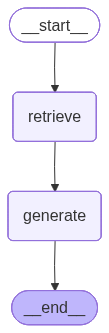

In [43]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

병렬처리나 conditional_edge 가 없는 경우 add_sequence()를 통해 순차적으로 동작하는 그래프를 생성할 수 있다. 

In [44]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [45]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [46]:
sequence_graph = sequence_graph_builder.compile()

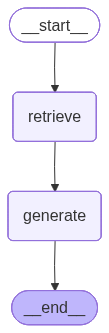

In [47]:
display(Image(sequence_graph.get_graph().draw_mermaid_png()))

In [48]:
initial_state = {'query': query}
graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(id='8125a242-087b-4e4b-8d90-31f925d202f9', metadata={'source': './documents/income_tax.md'}, page_content='소득세법\n\n소득(이하 이 조에서 “임용근로소득”이라 한다)에 대한 지급명세서의 경우에는 제출하지 아니한 본인 지급금액의 1만분의 25(제출기한이 지난 후 1개월 이내에 제출하는 경우에는 지급금액의 10만분의 12.5)로 한다. 나. 간이지급명세서의 경우: 제출하지 아니한 본인 지급금액의 1만분의 20(제출기한이 지난 후 1개월 이내에 제출하는 경우에는 지급금액의 10만분의 12.5로 한다).\n\n제출된 지급명세서 등이 대통령령으로 정하는 불분명한 경우에 해당하거나 제출된 지급명세서에 기재된 지급금액이 사실과 다른 경우: 다음 각 목의 구분에 따른 금액 가. 지급명세서의 경우: 불분명하거나 사실과 다른 본인 지급금액의 100분의 1. 다만, 임용근로소득에 대한 지급명세서의 경우에는 불분명하거나 사실과 다른 본인 지급금액의 1만분의 25로 한다. 나. 간이지급명세서의 경우: 불분명하거나 사실과 다른 본인 지급금액의 1만분의 25'),
  Document(id='1c8e2c77-7853-4bc7-b12f-a5bbe155be8f', metadata={'source': './documents/income_tax.md'}, page_content='연금소득 중 다음 각 목의 어느 하나에 해당하는 소득 가.「국민연금법」, 「공무원연금법」또는「군인연금법에 봅사는」,「군인연금법」,「사람 영화교교원 연금법」,「법원경위직하」또는「공무원연금법에 관련 법률」(이하”국정연금 관련법물”이라 한다)에 따라 받는 유족급여·퇴직유족연금·장해유로금·상이유족연금·순직유족연금\n\n소득세법\n\n금 · 직무상유족연금 · 위험직무순직유족연금, 장애연금, 장애연금 · 비직무상 장애연금 · 비직무상 장애연금, 상이